# Based on the given dataset predict the  Car Prices using K-Nearest Neighbors.

In [1]:
# These are the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#importing the data set
car=pd.read_csv(r'C:\Users\Ramesh\Downloads\Cars data.csv')
car.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
# Checking the '?' values and pacing nan in that.. 
car=car.replace('?',np.nan)

In [4]:
# Checking for null values(It gives null values)
car.isnull().sum()

symboling              0
normalized_losses    492
make                   0
fuel_type              0
aspiration             0
num_doors             24
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
num_cylinders          0
engine_size            0
fuel_system            0
bore                  48
stroke                48
compression_ratio      0
horsepower            24
peak_rpm              24
city_mpg               0
highway_mpg            0
price                 48
dtype: int64

In [5]:
#Represents the rows and columns
car.shape

(2460, 26)

In [6]:
#represents some top columns
car.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
nullcnv=car.replace(to_replace = np.nan, value = 140)  #nullcv = nullcnv.fillna(cars_num.mean()) #placing nan with 143

In [8]:
#care = car.fillna(car.mean())


In [9]:
car.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [10]:
car.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [11]:
k=car['wheel_base']
#k['make']==143
k.head()
#k.isnull().sum()
#k[k['make']=='143']#

0    88.6
1    88.6
2    94.5
3    99.8
4    99.4
Name: wheel_base, dtype: float64

In [12]:
nullcnv.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,140,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,140,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,140,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [13]:
nullcnv.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [14]:
nullcnv.isnull().sum()           #full to know how many null values

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [15]:
# Import label encoder 
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
nullcnv['make']= label_encoder.fit_transform(nullcnv['make']) 
  
nullcnv['make'].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)

In [16]:
nullcnv.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,140,0,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,140,0,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,140,0,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,1,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [17]:
# converting the string to values
dummies=pd.get_dummies(nullcnv,columns=['make','fuel_type','aspiration','num_doors','body_style','engine_type','num_cylinders','drive_wheels','engine_location','fuel_system'])
dummies.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,engine_location_front,engine_location_rear,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,140,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,0,0,0,0,0,0,1,0,0
1,3,140,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,0,0,0,0,0,0,1,0,0
2,1,140,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,...,1,0,0,0,0,0,0,1,0,0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,...,1,0,0,0,0,0,0,1,0,0


In [18]:
dummies.shape

(2460, 77)

In [19]:
type(dummies)  #To know the dataset in which type

pandas.core.frame.DataFrame

In [20]:
x1=dummies.iloc[:,0:-1]
x1.head()
type(x1)

pandas.core.frame.DataFrame

In [21]:
x1.shape

(2460, 76)

In [22]:
type(x1)

pandas.core.frame.DataFrame

In [23]:
y=nullcnv.iloc[:,-1]
y.head()
type(y)




pandas.core.series.Series

In [24]:
# y=pd.DataFrame(y)
# type(y)
# y.head()

In [25]:
#label_encoder=preprocessing.LabelEncoder()
#nullcnv['make']=label_encoder.fit_transform(nullcnv['make'])
#nullcnv['make'].unique()

In [26]:
#nullcnv.head(1)

In [27]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [28]:
scaling=scale(x1)  #Scalling the data to make the data same scaling
type(scaling)

numpy.ndarray

In [29]:
dframe=pd.DataFrame(scaling)
dframe.head()
type(dframe)

pandas.core.frame.DataFrame

In [30]:
#applying PCA(principal component annalysis)
apply_pca=PCA()
pca_values=PCA().fit_transform(dframe)
pca_values=apply_pca.fit_transform(dframe)

In [31]:
type(apply_pca)

sklearn.decomposition.pca.PCA

In [32]:
type(pca_values)

numpy.ndarray

In [33]:

variance=apply_pca.explained_variance_ratio_
variance

array([1.48316030e-01, 9.64786241e-02, 6.87431417e-02, 5.28278692e-02,
       4.53085067e-02, 3.84257570e-02, 3.46619549e-02, 3.20193458e-02,
       2.89904223e-02, 2.69759774e-02, 2.63043971e-02, 2.60762518e-02,
       2.26677084e-02, 2.22213921e-02, 2.07444054e-02, 2.01779558e-02,
       2.00861168e-02, 1.91959659e-02, 1.87770645e-02, 1.75619600e-02,
       1.65106514e-02, 1.48572371e-02, 1.43994746e-02, 1.41657688e-02,
       1.32390372e-02, 1.28667904e-02, 1.23432135e-02, 1.11377476e-02,
       1.03473275e-02, 9.70702410e-03, 8.82830982e-03, 8.21042604e-03,
       7.79345948e-03, 6.07089884e-03, 5.85607355e-03, 5.59875843e-03,
       5.16185133e-03, 4.77185019e-03, 4.46855780e-03, 3.46800140e-03,
       3.03276446e-03, 2.78001035e-03, 2.62620154e-03, 2.31661898e-03,
       2.02774019e-03, 1.74982167e-03, 1.59394194e-03, 1.19456944e-03,
       1.02021774e-03, 9.17049622e-04, 8.51491816e-04, 8.15904891e-04,
       6.52109169e-04, 5.41294564e-04, 4.97730998e-04, 4.32166820e-04,
      

In [34]:
(apply_pca.components_)
pccomp=pd.DataFrame(apply_pca.components_)
pccomp

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,-6.095046e-02,7.061883e-02,2.259577e-01,2.580616e-01,2.564446e-01,8.115764e-02,2.859543e-01,2.553849e-01,5.519739e-03,3.191871e-03,...,2.182510e-01,-0.047858,0.047858,-7.838924e-02,-1.842973e-01,8.166058e-05,5.355023e-02,-1.905146e-03,1.851926e-01,-1.898755e-02
1,2.307580e-01,1.472271e-01,-1.598992e-01,-9.617524e-02,-5.069418e-02,-2.384755e-01,-2.918520e-02,3.185361e-02,1.944382e-01,1.935287e-01,...,7.031327e-02,-0.114069,0.114069,7.588143e-03,-2.038667e-02,1.724197e-01,-2.288627e-01,1.837972e-02,8.991630e-02,3.838873e-02
2,2.447033e-02,1.598262e-02,5.756321e-02,1.642449e-02,3.645443e-02,5.376617e-03,3.332089e-03,-1.141756e-01,3.449485e-01,3.463187e-01,...,6.929827e-02,0.096353,-0.096353,-2.474832e-02,-5.606589e-02,3.159688e-01,2.162599e-01,-3.581964e-03,-1.370195e-01,-8.249702e-03
3,2.183547e-01,1.329386e-01,-1.148194e-01,-1.037318e-01,-7.492694e-03,-1.616902e-01,3.747607e-03,7.049953e-02,-1.232013e-01,-1.211675e-01,...,3.273931e-02,-0.192002,0.192002,5.614837e-03,-8.840714e-02,-1.123654e-01,2.502324e-01,5.177260e-02,-1.045197e-01,1.298951e-01
4,-5.316742e-02,-1.348533e-01,-6.655262e-02,-5.344355e-02,-1.021189e-01,9.862477e-02,-5.320090e-02,-3.116885e-02,4.737479e-02,4.202230e-02,...,5.322773e-02,-0.338882,0.338882,-3.024618e-02,9.036430e-02,4.372225e-02,7.769722e-02,-8.218463e-02,-1.538057e-02,-2.399208e-01
5,4.164270e-02,-4.518808e-02,-6.098541e-03,1.598468e-02,1.135430e-03,1.648122e-02,2.739697e-02,-1.072660e-01,4.161732e-03,-4.994528e-04,...,-6.243286e-02,-0.054510,0.054510,-1.054419e-01,-1.337645e-02,1.647671e-03,-7.521890e-02,7.767770e-02,-6.673545e-03,2.474273e-01
6,4.031199e-02,1.809829e-01,3.612108e-02,5.935333e-03,-8.393684e-02,-1.218103e-02,2.001342e-02,-2.976383e-02,-4.739866e-02,-4.989082e-02,...,1.993337e-01,0.138301,-0.138301,-8.669710e-02,2.726974e-02,-4.628037e-02,-1.923611e-02,-1.443478e-02,5.543439e-02,-5.273651e-02
7,-5.611139e-03,-1.023758e-01,-7.657916e-03,-2.390901e-02,7.385190e-02,-6.555435e-02,4.024625e-02,1.290621e-01,-6.880171e-03,-8.610613e-03,...,-9.979966e-02,0.194319,-0.194319,-1.414468e-01,2.107528e-01,-3.715997e-03,2.864110e-02,5.628247e-03,-1.339809e-01,-4.050189e-02
8,-9.648618e-02,-1.576624e-01,6.826276e-02,-3.612782e-02,7.354480e-02,1.050077e-01,3.022150e-02,4.018652e-03,-6.484793e-03,-6.694864e-03,...,5.256142e-02,0.023073,-0.023073,5.074644e-01,-1.370347e-01,-4.914158e-03,-3.803046e-02,-1.546529e-02,-5.016588e-02,-6.018386e-02
9,1.414949e-01,-2.494326e-02,-3.486287e-02,3.908315e-02,2.151036e-03,1.071599e-01,-8.913741e-03,-1.035860e-01,-1.486091e-02,-1.487062e-02,...,8.390597e-03,0.080044,-0.080044,1.138891e-02,-1.721725e-01,-2.052362e-02,3.562017e-02,-2.154651e-02,2.309567e-01,-2.172032e-01


In [35]:

variance

array([1.48316030e-01, 9.64786241e-02, 6.87431417e-02, 5.28278692e-02,
       4.53085067e-02, 3.84257570e-02, 3.46619549e-02, 3.20193458e-02,
       2.89904223e-02, 2.69759774e-02, 2.63043971e-02, 2.60762518e-02,
       2.26677084e-02, 2.22213921e-02, 2.07444054e-02, 2.01779558e-02,
       2.00861168e-02, 1.91959659e-02, 1.87770645e-02, 1.75619600e-02,
       1.65106514e-02, 1.48572371e-02, 1.43994746e-02, 1.41657688e-02,
       1.32390372e-02, 1.28667904e-02, 1.23432135e-02, 1.11377476e-02,
       1.03473275e-02, 9.70702410e-03, 8.82830982e-03, 8.21042604e-03,
       7.79345948e-03, 6.07089884e-03, 5.85607355e-03, 5.59875843e-03,
       5.16185133e-03, 4.77185019e-03, 4.46855780e-03, 3.46800140e-03,
       3.03276446e-03, 2.78001035e-03, 2.62620154e-03, 2.31661898e-03,
       2.02774019e-03, 1.74982167e-03, 1.59394194e-03, 1.19456944e-03,
       1.02021774e-03, 9.17049622e-04, 8.51491816e-04, 8.15904891e-04,
       6.52109169e-04, 5.41294564e-04, 4.97730998e-04, 4.32166820e-04,
      

In [36]:
cumvar=np.cumsum(np.round(variance,decimals=4)*100)  #cummulative variance
cumvar

array([ 14.83,  24.48,  31.35,  36.63,  41.16,  45.  ,  48.47,  51.67,
        54.57,  57.27,  59.9 ,  62.51,  64.78,  67.  ,  69.07,  71.09,
        73.1 ,  75.02,  76.9 ,  78.66,  80.31,  81.8 ,  83.24,  84.66,
        85.98,  87.27,  88.5 ,  89.61,  90.64,  91.61,  92.49,  93.31,
        94.09,  94.7 ,  95.29,  95.85,  96.37,  96.85,  97.3 ,  97.65,
        97.95,  98.23,  98.49,  98.72,  98.92,  99.09,  99.25,  99.37,
        99.47,  99.56,  99.65,  99.73,  99.8 ,  99.85,  99.9 ,  99.94,
        99.96,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  ])

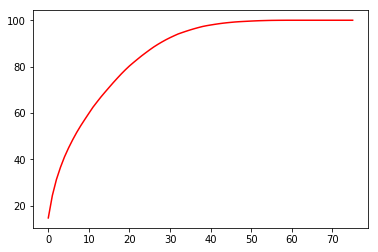

In [37]:
plt.plot(cumvar,color='red')

In [38]:
x=pd.DataFrame(pca_values[:,0:3])
x.head()

,0,1,2
0,0.573924,3.873293,-1.431903
1,0.669354,3.887952,-1.444279
2,2.728034,3.644863,-1.448818
3,-0.072568,-0.308301,-0.719712
4,2.281799,0.180402,-0.763283


In [39]:
x.shape

(2460, 3)

In [40]:
y.shape

(2460,)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import scale

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) # spliting the data into train and test,giving some size,random-says that don't change the values in size

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1722, 3)
(738, 3)
(1722,)
(738,)


In [44]:
y_train.head()

1217    13845
1150    22018
2006     8358
516     18399
1287    13645
Name: price, dtype: object

In [45]:
y.isnull().sum()

0

In [46]:
pd.get_dummies(y,columns=['price']).sum().head()

140      48
10198    12
10245    12
10295    12
10345    12
dtype: int64

In [47]:
X_train = x_train.astype(float) #convering some string values to float

In [48]:
y_train1 = y_train.astype(int)  #convering some string values to int

In [49]:
knn1=KNeighborsClassifier(n_neighbors=11,metric='euclidean')  #applying knn
knn1.fit(X_train,y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [50]:

knn1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [51]:

y_predict=knn1.predict(x_test)
np.mean(y_predict == y_test)

0.02168021680216802

In [52]:
y_predict.dtype


dtype('int32')

In [53]:
y_test.dtype

dtype('O')

In [54]:
x_test.head()

,0,1,2
2446,1.452738,-0.841506,-0.438516
289,-0.196583,1.942125,-0.259589
1683,-1.551820,-0.516816,-0.460574
1073,7.957915,1.135279,-1.807042
2205,-1.478569,-1.868499,-0.624189


In [55]:
y_test=y_test.astype(int)

In [104]:
confusion_matrix=confusion_matrix(y_predict,y_test)
confusion_matrix

array([[16,  0,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  5,  0,  0],
       [ 0,  0,  0, ...,  0,  3,  0],
       [ 0,  0,  0, ...,  0,  0,  2]], dtype=int64)

def perf_measure(y_test, y_predict):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_predict)): 
        if y_test[i]==y_predict[i]==1:
            TP += 1
        if y_test[i]==1 and y_test[i]!=y_predict[i]:
            FP += 1
        if y_test[i]==y_pred[i]==0:
            TN += 1
        if y_test[i]==0 and y_test[i]!=y_predict[i]:
            FN += 1

    return(TP, FP, TN, FN)
perf_measure(y_test,y_predict)

In [126]:
confusion_matrix

array([[16,  0,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  5,  0,  0],
       [ 0,  0,  0, ...,  0,  3,  0],
       [ 0,  0,  0, ...,  0,  0,  2]], dtype=int64)

In [119]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("true poditive",TPR)

true poditive [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.36363636 1.
 1.         1.         1.         1.         1.         1.
 1.         1.                nan 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.125      1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.22222222 1.         1.
 1.         1.         1.         1.         1.                nan
 1.         1.         1.         1.                nan 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         

D:\intern\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
D:\intern\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
Besides the accuracy, there are several other performance measures which can be computed 
from the confusion matrix. 
Some of the main ones are obtained using the function classification_report:

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

        140       1.00      1.00      1.00        16
       5118       1.00      1.00      1.00         2
       5151       1.00      1.00      1.00         4
       5195       1.00      1.00      1.00         4
       5348       1.00      1.00      1.00         3
       5389       1.00      1.00      1.00         5
       5399       1.00      1.00      1.00         3
       5499       1.00      1.00      1.00         5
       5572       1.00      1.00      1.00         8
       6095       1.00      1.00      1.00         4
       6189       0.36      1.00      0.53         4
       6229       1.00      1.00      1.00        10
       6295       1.00      1.00      1.00         3
       6338       1.00      1.00      1.00         4
       6377       1.00      1.00      1.00         5
       6479       1.00      1.00      1.00         6
       6488       1.00      1.00      1.00         3
       6529       1.00      1.00      1.00   

D:\intern\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
accuracy_score(y_predict,y_test)

0.9525745257452575

In [58]:
np.mean(y_test==y_predict)

0.9525745257452575

In [59]:
y.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: object

In [60]:
k.head()

0    88.6
1    88.6
2    94.5
3    99.8
4    99.4
Name: wheel_base, dtype: float64

In [61]:
y=nullcnv['price']
y.head()
type(y) #output column must be in pandas.core.series.Series
y.dtype #dtype('O')- y is in string format we have to convert it into int or float
z=y.astype(int) # It converts dtype('O')-->dtype('int32')
z.dtype 

dtype('int32')

In [62]:
p=nullcnv['engine_size']
p.head()
type(p)
p.dtype

#p

dtype('int64')

In [63]:
p.dtype

dtype('int64')

Text(0,0.5,' car price')

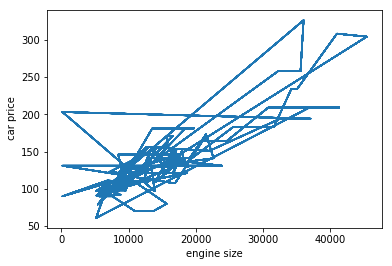

In [64]:
% matplotlib inline
plt.plot(z,p)
plt.xlabel("engine size")
plt.ylabel(" car price")